# Predicting the Demand of Airbnb Rentals

**Team Members:** Kelli Belcher, Nessie Tran, Adrianne Kristianto


### Introduction
Since 2008, Airbnb has revolutionized the way people travel and has become a popular alternative to hotels.
For our final project, our team will analyze data on Airbnb listings in Austin, TX using the Kaggle dataset: https://www.kaggle.com/clnguyen/austinairbnbs20191112 as well as: http://insideairbnb.com/get-the-data.html. There are two datasets that we will primarily focus on. The first one consists of several features about each of the listings in Austin, including the neighborhood, the room type (private room, entire apartment, etc.),  the number of reviews it has, the price of the listing, and the minimum night stay. In addition, there is a separate data set with detailed information on the review dates that are linked to the listing IDs. The  and we can use this information to visualize how the number of reviews have increased over time and explore how the demand for Airbnb has changed over the years. 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

# Loading the data
airbnb = pd.read_csv("listings.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,179,7,24,2019-03-16,0.17,3,129
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,95,2,536,2020-10-11,3.79,1,360
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,20,2012-05-24,0.14,2,85
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,257,2019-11-03,2.00,1,78


## Exploratory Data Analysis

In [28]:
# Checking information about the dataset, including the number of rows and types of columns
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10305 entries, 0 to 10304
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10305 non-null  int64  
 1   name                            10305 non-null  object 
 2   host_id                         10305 non-null  int64  
 3   host_name                       10302 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10305 non-null  int64  
 6   latitude                        10305 non-null  float64
 7   longitude                       10305 non-null  float64
 8   room_type                       10305 non-null  object 
 9   price                           10305 non-null  int64  
 10  minimum_nights                  10305 non-null  int64  
 11  number_of_reviews               10305 non-null  int64  
 12  last_review                     

In [29]:
# Checking for missing data
airbnb.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             3
neighbourhood_group               10305
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2686
reviews_per_month                  2686
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [30]:
# Dropping columns that are not relevant to our analysis and predictions
airbnb.drop(['id', 'host_name', 'neighbourhood_group'], axis=1, inplace=True)

# Checking the new dataset
airbnb.head(3)

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Zen-East in the Heart of Austin (monthly rental),2466,78702,30.27750,-97.71398,Entire home/apt,179,7,24,2019-03-16,0.17,3,129
1,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,"Walk to 6th, Rainey St and Convention Ctr",8028,78702,30.26112,-97.73448,Entire home/apt,95,2,536,2020-10-11,3.79,1,360


In [31]:
# Replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)

# Double check for any missing data
airbnb.isnull().sum()

name                                 0
host_id                              0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2686
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [32]:
# Summary statistics for each numerical column
airbnb.describe()

,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.030500e+04,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000
mean,9.194110e+07,78722.906259,30.282216,-97.752554,269.345852,8.661426,30.841145,0.978325,34.400485,123.150412
std,1.080553e+08,20.801187,0.061437,0.057906,591.437763,24.200443,66.108801,1.583423,119.701892,140.633766
min,2.300000e+01,78701.000000,30.078870,-98.056630,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.059533e+07,78704.000000,30.245390,-97.770430,81.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.312843e+07,78721.000000,30.269560,-97.744600,133.000000,2.000000,5.000000,0.260000,1.000000,58.000000
75%,1.380076e+08,78744.000000,30.305370,-97.720270,260.000000,3.000000,29.000000,1.330000,4.000000,269.000000
max,3.717185e+08,78759.000000,30.515280,-97.560620,10754.000000,999.000000,951.000000,23.860000,539.000000,365.000000


In [33]:
# Checking the unique room types
airbnb.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [129]:
# Drop missing Date from Airbnb data, to compare the average price by Month and Year
airbnb_valid_date = airbnb.dropna()

In [85]:
month=[]
year=[]
m_y = []
for row in airbnb_valid_date['last_review']:
    year.append(row[:4])
    month.append(row[5:7])
    m_y.append(row[:7])

airbnb_valid_date["Month"]=month
airbnb_valid_date["Year"]=year
airbnb_valid_date["Month-Year"]=m_y

airbnb_valid_date.head(3)

<ipython-input-85-19aec7381d5e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_valid_date["Month"]=month
<ipython-input-85-19aec7381d5e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_valid_date["Year"]=year
<ipython-input-85-19aec7381d5e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Month,Year,Month-Year
0,Zen-East in the Heart of Austin (monthly rental),2466,78702,30.27750,-97.71398,Entire home/apt,179,7,24,2019-03-16,0.17,3,129,03,2019,2019-03
1,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0,03,2018,2018-03
2,"Walk to 6th, Rainey St and Convention Ctr",8028,78702,30.26112,-97.73448,Entire home/apt,95,2,536,2020-10-11,3.79,1,360,10,2020,2020-10


In [123]:
# Compare average price by Year
meanbyyear=airbnb_valid_date.groupby(pd.Grouper(key="Year")).mean().sort_values("Year", ascending=True)

meanyear =meanbyyear["price"]

meanyear

Year
2011     65.000000
2012    240.666667
2013    396.900000
2014    582.000000
2015    291.078571
2016    253.275410
2017    222.844340
2018    248.294872
2019    232.924127
2020    241.835783
Name: price, dtype: float64

In [124]:
# Compare average price by Month
meanbymonth=airbnb_valid_date.groupby(pd.Grouper(key="Month")).mean().sort_values("Month", ascending=True)

meanmonth =meanbymonth["price"]

meanmonth

Month
01    201.379518
02    232.415282
03    256.657914
04    308.243137
05    302.937931
06    258.694340
07    383.456422
08    244.767285
09    252.783154
10    197.939275
11    226.299742
12    153.473333
Name: price, dtype: float64

Text(0, 0.5, 'Price')

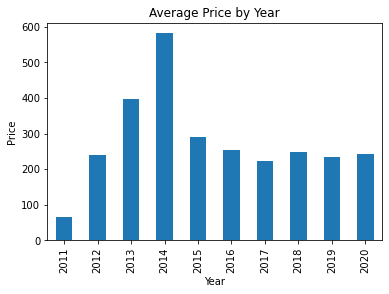

In [148]:
# Bar chart compare average price by Year
meanbyyear.plot(kind="bar", y="price", legend=None)
plt.title("Average Price by Year")
plt.xlabel("Year")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

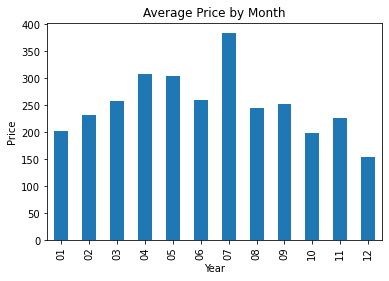

In [149]:
# Bar chart compare average price by Month
meanbymonth.plot(kind="bar", y="price", legend=None)
plt.title("Average Price by Month")
plt.xlabel("Year")
plt.ylabel("Price")

In [127]:
# Bar chart compare average price over 6 years
meanbymy=airbnb_valid_date.groupby(pd.Grouper(key="Month-Year")).mean().sort_values("Month-Year", ascending=True)

meanmy =meanbymy["price"]

meanmy

Month-Year
2011-03     65.000000
2012-03    347.666667
2012-05     46.000000
2012-10     55.000000
2012-11    300.000000
              ...    
2020-06    298.451220
2020-07    496.268657
2020-08    252.015590
2020-09    250.737279
2020-10    182.809065
Name: price, Length: 85, dtype: float64

NameError: name 'x' is not defined

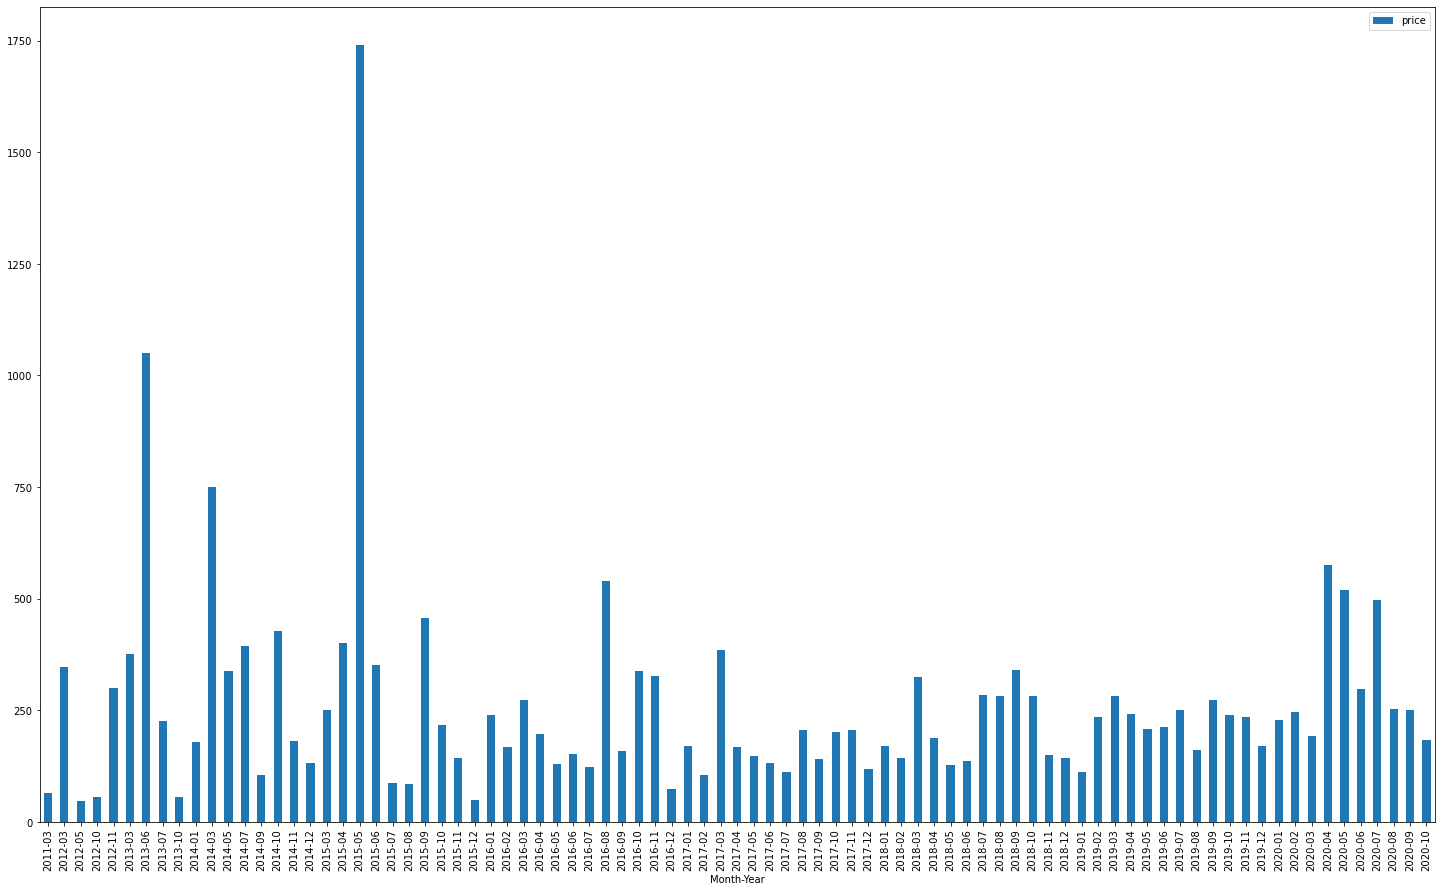

In [184]:
meanbymy.plot(kind="bar", y="price", figsize = (25,15))
plt.xticks(x, rotation="vertical")
meanbymy['number_of_reviews'].plot(secondary_y=True, color="Red", legend = True)
plt.title("Average Price by Month-Year")
plt.xlabel("Month of Year")
plt.ylabel("Price")

In [131]:
# Compare price by Room_Type

meanrt=airbnb.groupby(["room_type"]).mean()

priceroom =meanrt["price"]

priceroom

room_type
Entire home/apt    314.128548
Hotel room         610.153846
Private room       114.001851
Shared room         68.902985
Name: price, dtype: float64

Text(0, 0.5, 'Price')

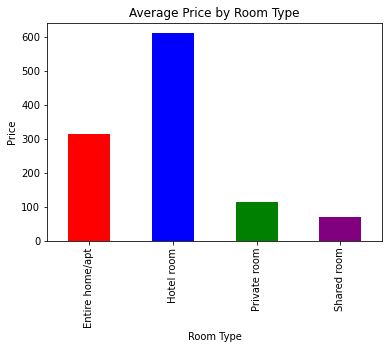

In [147]:
# Histogram to compare price by room type
meanrt.plot(kind="bar", y="price", color=["Red", "Blue", "Green", "Purple"], legend=None)
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price")

Text(0, 0.5, '')

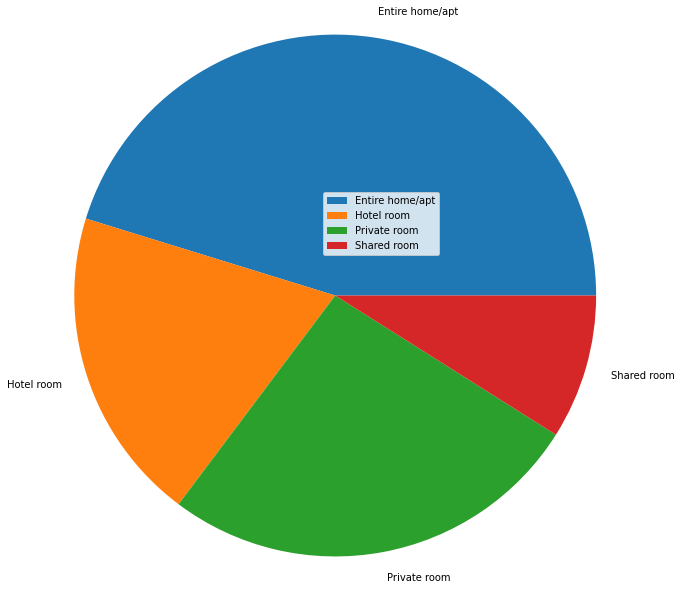

In [202]:
# Number of review by room type

meanrt.plot.pie( y="number_of_reviews", radius=3)
plt.ylabel("")

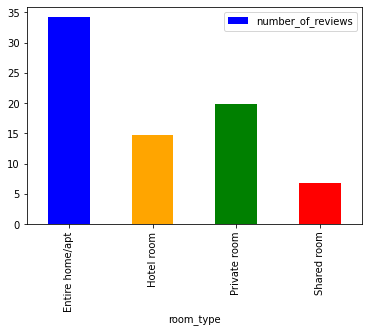

In [203]:

meanrt.plot(kind="bar", y="number_of_reviews", color=["blue", "Orange", "Green", "Red"])

Text(0.5, 1.0, 'Total Number of Room Types')

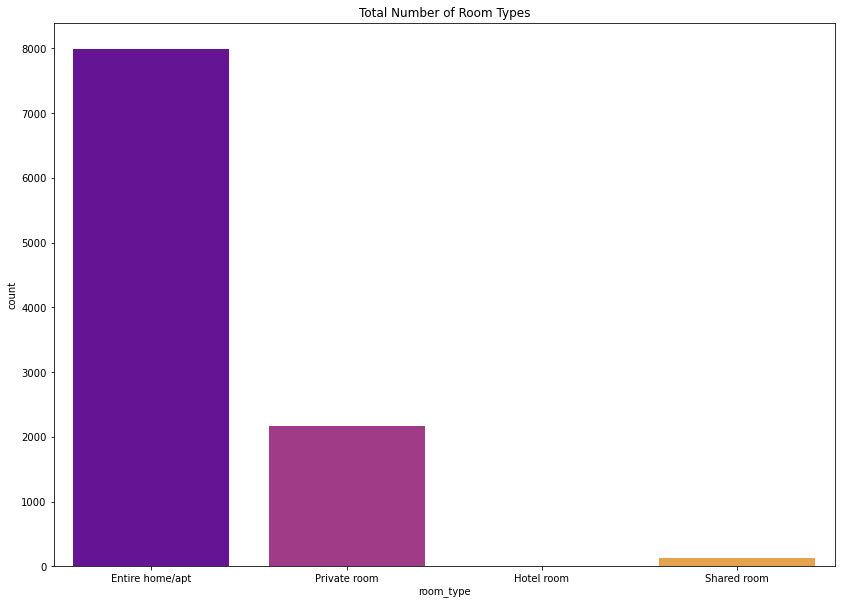

In [8]:
# Bar chart of the total number of room types
sns.countplot(airbnb['room_type'], palette="plasma")
roomtype_bar = plt.gcf()
roomtype_bar.set_size_inches(14, 10)
plt.title('Total Number of Room Types')

In [9]:
# Checking which hosts have the most listings based on their Host ID
top_10_hosts = airbnb.host_id.value_counts().head(10)
top_10_hosts

359036978    539
104309976    119
8167447       81
109638288     55
118565935     54
194953121     48
210733801     47
124060715     40
15782486      38
4929310       33
Name: host_id, dtype: int64

Text(0, 0.5, 'Number of Unique Listings')

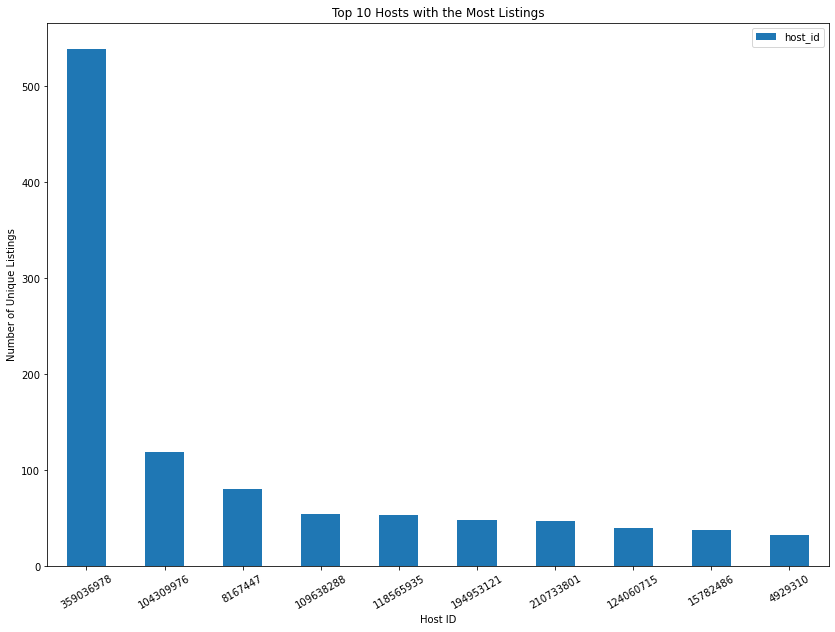

In [10]:
# Bar chart of the Top 10 Hosts with the Most Listings 
top_host = pd.DataFrame(airbnb.host_id.value_counts().head(10))
top_host.plot(kind="bar", figsize = (14,10))
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Top 10 Hosts with the Most Listings")
plt.xlabel("Host ID")
plt.ylabel("Number of Unique Listings")

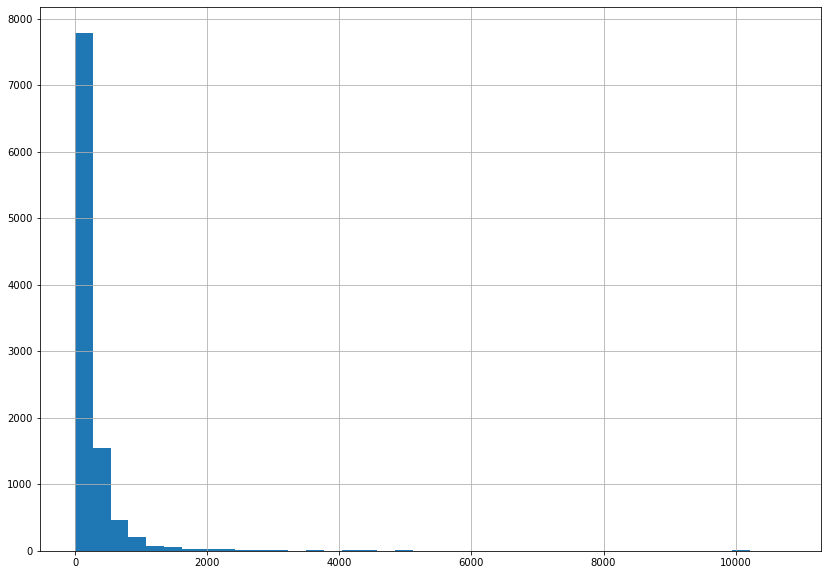

In [11]:
# Histogram of listing prices 
airbnb['price'].hist(bins=40, figsize=(14,10))
plt.show()

In [12]:
# Checking the 10 most reviewed listings
top_reviewed_listings = airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
420,Backyard Cottage in Central Austin,5620519,78722,30.29087,-97.71895,Entire home/apt,90,1,951,10.42,1,0
467,Stay and Enjoy The Austin Texas House South Co...,740347,78704,30.24705,-97.75555,Entire home/apt,126,1,836,9.82,1,312
376,"Vintage Airstream in East Austin, Texas",5152543,78723,30.29940,-97.67747,Entire home/apt,71,1,825,8.85,2,0
78,South Congress Studio Apartment,989596,78704,30.24776,-97.74527,Entire home/apt,57,1,746,6.75,2,314
377,Downtown Austin Texas Condo,1648173,78701,30.28086,-97.74529,Entire home/apt,76,1,745,8.02,2,358
772,Garden Cottage in East Austin,5152543,78723,30.29722,-97.68262,Entire home/apt,75,1,720,8.96,2,322
1114,Tiny House in the Heart of the East Side,3353143,78702,30.25565,-97.71426,Entire home/apt,97,2,690,9.88,2,131
20,"Zilker Park, Fun, Funky, Colorful, Peaceful Haven",272156,78704,30.25596,-97.76866,Entire home/apt,83,1,689,5.77,2,356
425,Downtown Austin Condo,1648173,78701,30.28000,-97.74403,Entire home/apt,74,1,677,7.41,2,167
234,Travis Heights Hideaway SoCo studio,2076136,78704,30.24380,-97.73968,Entire home/apt,79,4,651,6.61,2,267


In [13]:
avg_topreviewed = top_reviewed_listings.price.mean()
print('Average price per night of the top reviewed listings: ${}.'.format(avg_topreviewed))

Average price per night of the top reviewed listings: $82.8.


In [14]:
# Checking the Top 10 Neighbourhoods with the most listings by zip code
airbnb.neighbourhood.value_counts().head(10)

78704    1868
78702    1307
78701     730
78741     647
78703     534
78745     477
78705     451
78751     436
78723     313
78758     305
Name: neighbourhood, dtype: int64

Text(0.5, 1.0, 'The number of listings in each neighborhood')

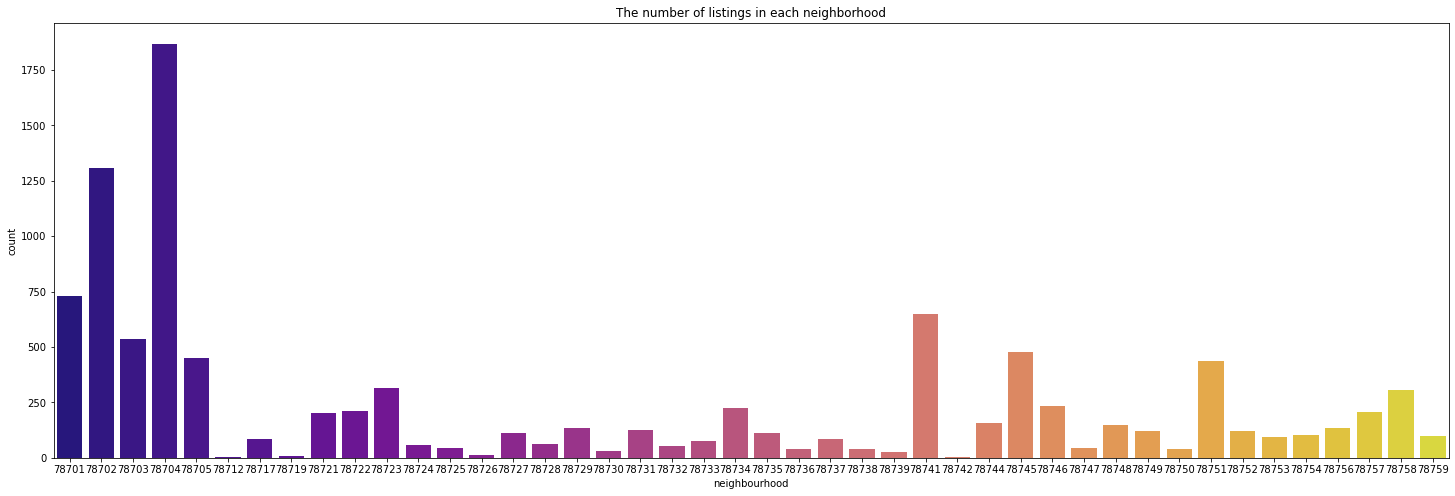

In [119]:
# Plotting the number of listings in each neighborhood
sns.countplot(airbnb['neighbourhood'], palette="plasma")
neighborhood_count = plt.gcf()
neighborhood_count.set_size_inches(25,8)
plt.title('The number of listings in each neighborhood')

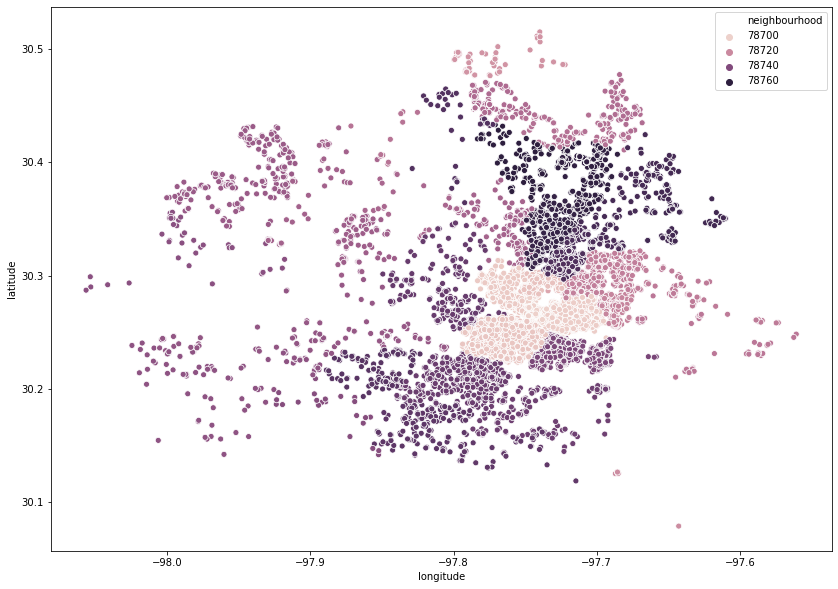

In [16]:
# Plotting listings by neighborhood
plt.figure(figsize=(14,10))
sns.scatterplot(airbnb.longitude, airbnb.latitude, hue=airbnb.neighbourhood)
plt.ioff()

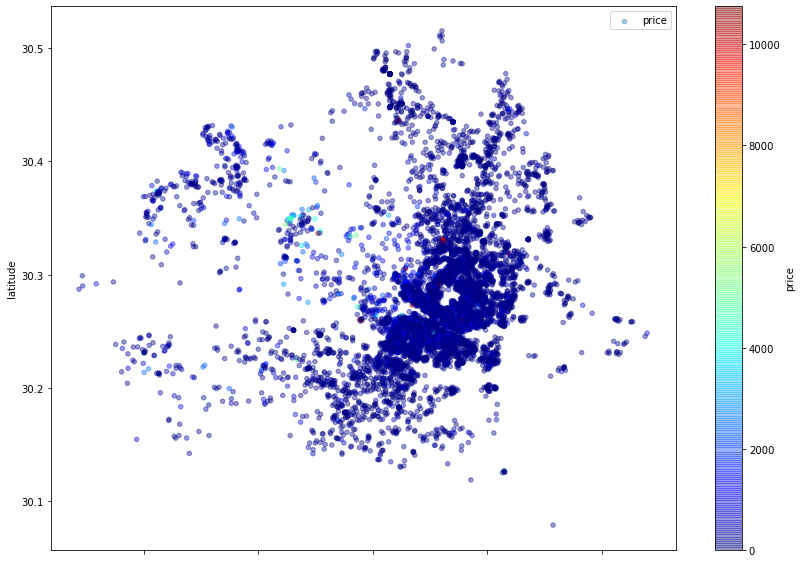

In [17]:
# Scatterplot of listing locations in Austin
airbnb.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, label="price", c="price",
                  cmap=plt.get_cmap('jet'), colorbar=True, figsize=(14,10))
plt.legend()

In [ ]:
# corr_matrix["median_house_value"].sort_values(ascending=False)